In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def step_function(x):
    return np.array(x > 0, dtype = int)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def relu(x):
    return np.maximum(0, x)

In [8]:
def show_activation_function(func):
    x = np.arange(-10, 10, 0.01)
    y = func(x)
    plt.plot(x, y)
    plt.show()

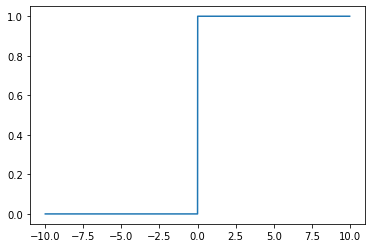

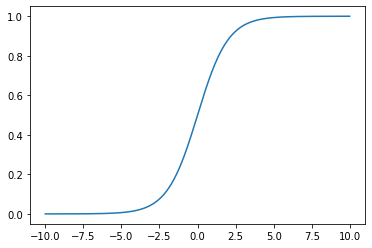

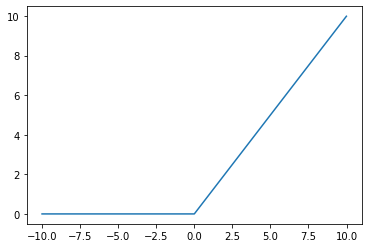

In [9]:
show_activation_function(step_function)
show_activation_function(sigmoid)
show_activation_function(relu)

In [10]:
def identity_function(x):
    return x

In [11]:
import numpy.random as random

class simple_3layer_NN:
    def __init__(self, x_len, h1_len, h2_len, output_len, initialize_num, activation_function_ = sigmoid):
        self.activation_function = activation_function_
        self.params = {}
        self.params["W1"] = random.random((x_len, h1_len)) / initialize_num
        self.params["b1"] = random.random(h1_len) / initialize_num
        self.params["W2"] = random.random((h1_len, h2_len)) / initialize_num
        self.params["b2"] = random.random(h2_len) / initialize_num
        self.params["W3"] = random.random((h2_len, output_len)) / initialize_num
        self.params["b3"] = random.random(output_len) / initialize_num
        
    def forward(self, x):
        a1 = x @ self.params["W1"] + self.params["b1"]
        z1 = self.activation_function(a1)
        a2 = z1 @ self.params["W2"] + self.params["b2"]
        z2 = self.activation_function(a2)
        a3 = z2 @ self.params["W3"] + self.params["b3"]
        z3 = self.activation_function(a3)
        return identity_function(z3)
        
        

In [12]:
from timeit import default_timer as timer
from datetime import timedelta

def time_NN():
    activation_function_list = [step_function, "step_function", sigmoid, "sigmoid", relu, "relu"] 
    x = random.random((30000, 1000))
    for i in range(3):
        activation_function = activation_function_list[i*2]
        activation_function_name = activation_function_list[i*2 + 1]        
        start = timer()
        Network_model = simple_3layer_NN(1000, 1500, 2000, 100, 100.0, activation_function)
        y = Network_model.forward(x)
        end = timer()
        plt.scatter(np.arange(100), y[0,:])
        plt.show()
        print(activation_function_name + " took " + str(timedelta(seconds=end-start)))

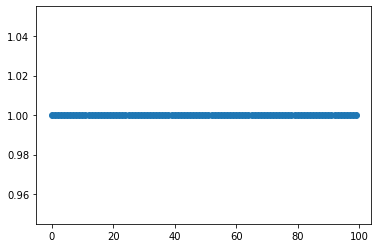

step_function took 0:00:02.254199


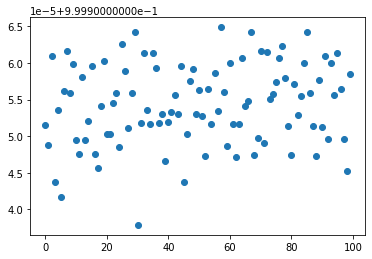

sigmoid took 0:00:02.793885


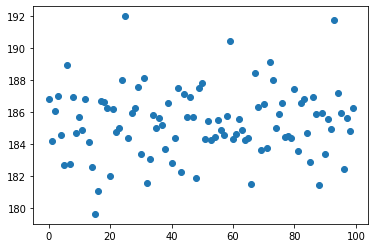

relu took 0:00:02.128628


In [13]:
time_NN()

In [14]:
a = np.arange(36).reshape(6, 6)
print(a)
print(a.max(axis=1).reshape(-1,1))
print(a - a.max(axis=1).reshape(-1,1))
print(a.ndim)
print(a.sum(axis =1))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[[ 5]
 [11]
 [17]
 [23]
 [29]
 [35]]
[[-5 -4 -3 -2 -1  0]
 [-5 -4 -3 -2 -1  0]
 [-5 -4 -3 -2 -1  0]
 [-5 -4 -3 -2 -1  0]
 [-5 -4 -3 -2 -1  0]
 [-5 -4 -3 -2 -1  0]]
2
[ 15  51  87 123 159 195]


In [15]:
def softmax(a):
    if(a.ndim == 2):
        c = a.max(axis=1).reshape(-1,1)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a, axis=1).reshape(-1,1)
        y = exp_a / sum_exp_a
        return y
    elif(a.ndim == 1):
        c = a.max()
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y
    
    else:
        print("Softmax is only implemented for arrays of dim 1 or 2 for now!")
        return 
    

In [16]:
a = np.array([[1,2],[7,4]])
print(a)
print("***")
c = a.max(axis=1).reshape(-1,1)
print(c)
print("***")
print(a.max(axis=1))
print("***")
exp_a = np.exp(a - c)
print(exp_a)
print("***")

sum_exp_a = np.sum(exp_a, axis=1).reshape(-1,1)
print(sum_exp_a)
print("***")

y = exp_a / sum_exp_a
print(y)


[[1 2]
 [7 4]]
***
[[2]
 [7]]
***
[2 7]
***
[[0.36787944 1.        ]
 [1.         0.04978707]]
***
[[1.36787944]
 [1.04978707]]
***
[[0.26894142 0.73105858]
 [0.95257413 0.04742587]]


In [17]:
import sys, os
sys.path.append("..")

In [31]:
from DLFS_book.dataset.mnist import load_mnist

(X_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize = True, one_hot_label = False)

In [32]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
y_train[0]

5

In [21]:
X_train.shape

(60000, 784)

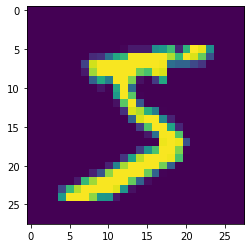

In [22]:
plt.imshow(X_train[0].reshape(28, 28))

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [24]:
import pickle

In [25]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        pass
    return network

In [26]:
def predict(network, x, return_class = False):
    W1, W2, W3 = network["W1"], network["W2"],network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = x @ W1 + b1
    z1 = sigmoid(a1)
    
    a2 = z1 @ W2 + b2
    z2 = sigmoid(a2)
    
    a3 = z2 @ W3 + b3
    
    y = softmax(a3)
    
    if(return_class):
        if(x.ndim == 1):
            return y.argmax()
        elif(x.ndim == 2):
            return y.argmax(axis = 1)
        else:
            print("when return_class is true, only 1, 2 dim of x is implemented!")
            return
    else:
        return y

In [27]:
network = init_network()

In [34]:
y_test_pred = predict(network, x_test, True)
y_test_pred[0]

7

In [29]:
x_test.shape

(10000, 784)

In [35]:
correct_for_num = np.array([0 for i in range(10)])
count_for_num = np.array([0 for i in range(10)])

for i in range(10000):
    label = y_test[i]
    count_for_num[label] += 1
    if(label == y_test_pred[i]):
        correct_for_num[label] += 1



<BarContainer object of 10 artists>

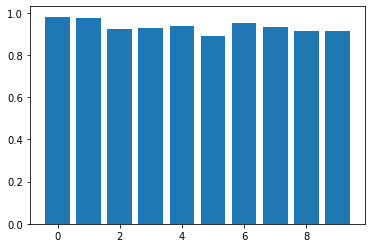

In [36]:
accuracy_for_num = correct_for_num / count_for_num
plt.bar(range(10), accuracy_for_num)

In [37]:
accuracy_for_num

array([0.98163265, 0.97709251, 0.92248062, 0.92772277, 0.93788187,
       0.88901345, 0.94989562, 0.93190661, 0.91170431, 0.91377602])

In [38]:
x_batch = x_test[:100]
predict(network, x_batch, True)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9])

In [39]:
def sum_squares_error(y, t):
    return .5*((y-t)**2).sum()

In [40]:
sum_squares_error(np.array([1,2,3]), np.zeros((3)))

7.0

In [41]:
(_, y_train_one_hot), (_, y_test_one_hot) = load_mnist(flatten=True, normalize = True, one_hot_label = True)

In [42]:
y_test_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [43]:
y_test_one_hot.shape

(10000, 10)

In [44]:
sum_squares_error(predict(network, x_test, False),  y_test_one_hot) / y_test.shape[0] 

0.04957911308935892

In [45]:
 def cross_entroy_error(y, t , one_hot_encoding= True):
        if one_hot_encoding:
            if y.ndim == 1:
                t = t.reshape(1, -1)
                y = y.reshape(1, -1)
            batch_size= y.shape[0]
            #print((t).shape)
            return -np.sum(np.log(y[t==1] + 1e-7)) / batch_size
        else:
            if y.ndim == 1:
                t = t.reshape(1, -1)
                y = y.reshape(1, -1)
            batch_size= y.shape[0]
            return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [46]:
y_test_pred_proba = predict(network, x_test, False)

In [47]:
cross_entroy_error(y_test_pred_proba, y_test_one_hot, True) 

0.2245436279296875

In [ ]:
cross_entroy_error(y_test_pred_proba, y_test, False) 